#  **Importing All the Libraries**

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# EXPLORATORY DATA ANALYSIS

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Swapnadeep1998/Heart-Disease-Prediction/master/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 
 
 **Checking For NULL values**

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**VISULISING IF MY DATASET IS BALANCED W.R.T THE TARGET**

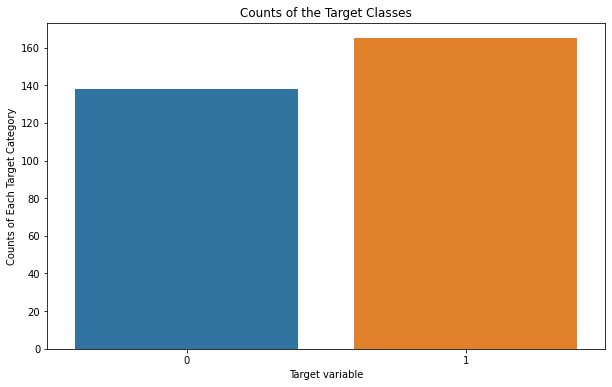

In [6]:
plt.figure(figsize = (10,6))
sns.countplot(df['target'])
plt.title("Counts of the Target Classes")
plt.xlabel('Target variable')
plt.ylabel('Counts of Each Target Category')
plt.show()

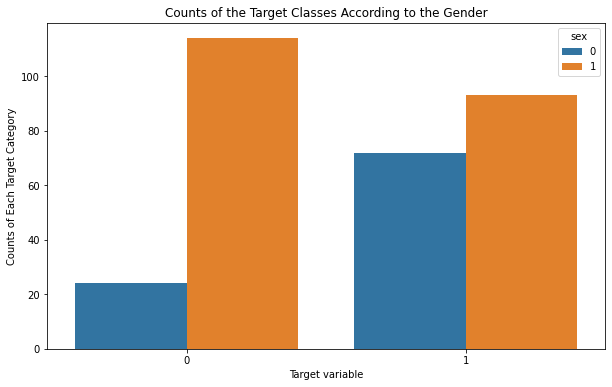

In [43]:
plt.figure(figsize = (10,6))
sns.countplot(df['target'], hue = df['sex'])
plt.title("Counts of the Target Classes According to the Gender")
plt.xlabel('Target variable')
plt.ylabel('Counts of Each Target Category')
plt.show()

Text(0, 0.5, 'Density of that age counts')

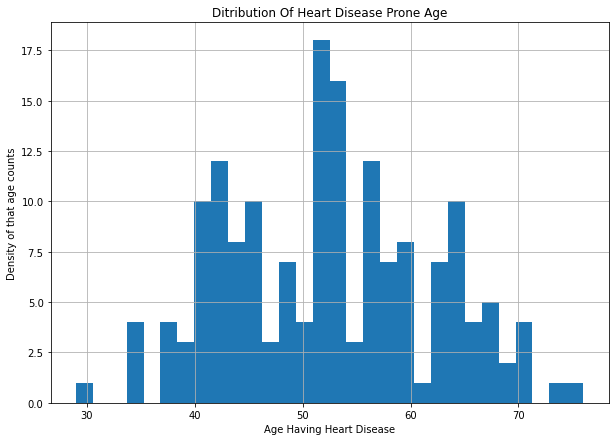

In [45]:
plt.figure(figsize = (10,7))
df[df['target']==1]['age'].hist(bins = 30)
#sns.distplot(df[df['target']==1]['age'], kde=True, color='red', bins=15, norm_hist=False)
plt.title("Ditribution Of Heart Disease Prone Age")
plt.xlabel("Age Having Heart Disease")
plt.ylabel("Density of that age counts")

Text(0, 0.5, 'AGE')

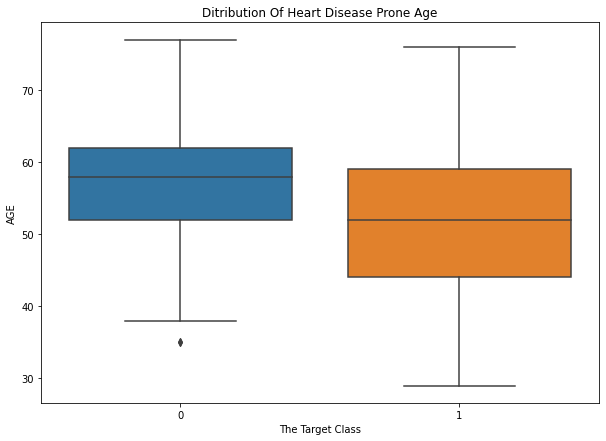

In [9]:
plt.figure(figsize = (10,7))
sns.boxplot(x = df['target'], y = df['age'])
plt.title("Ditribution Of Heart Disease Prone Age")
plt.xlabel("The Target Class")
plt.ylabel("AGE")

# Splitting The Dataset

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'],1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 45)

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Standard Scaling Our Data

In [41]:
from sklearn.preprocessing import StandardScaler

column_to_transform = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                       'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
X_train[column_to_transform] = StandardScaler().fit_transform(X_train[column_to_transform])
X_test[column_to_transform] = StandardScaler().fit_transform(X_test[column_to_transform])

/home/swapnadeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/swapnadeep/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/swapnadeep/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [42]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
212,-1.710522,0.715891,-0.904315,-0.771175,-0.540664,-0.438313,0.955442,-0.375098,-0.696177,0.120964,-0.639981,-0.711227,1.176653
227,-2.152064,0.715891,-0.904315,-0.660484,-0.951436,-0.438313,0.955442,-0.808799,1.436416,0.464345,-0.639981,-0.711227,1.176653
287,0.276420,0.715891,0.068326,1.221255,-0.286377,-0.438313,-0.924371,0.665785,-0.696177,-0.909179,1.025345,0.239695,-0.469301
25,1.821819,-1.396861,0.068326,1.553327,1.082864,-0.438313,0.955442,0.579045,-0.696177,-0.565798,1.025345,1.190618,-0.469301
8,-0.275508,0.715891,1.040967,2.217470,-0.931876,2.281475,0.955442,0.579045,-0.696177,-0.479953,1.025345,-0.711227,1.176653


# Prediction

In [15]:
from sklearn.tree import DecisionTreeClassifier
D_cls = DecisionTreeClassifier()

D_cls.fit(X_train,y_train)
y_pred = D_cls.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7868852459016393
[[20  3]
 [10 28]]
              precision    recall  f1-score   support

           0       0.67      0.87      0.75        23
           1       0.90      0.74      0.81        38

    accuracy                           0.79        61
   macro avg       0.78      0.80      0.78        61
weighted avg       0.81      0.79      0.79        61



In [17]:
from sklearn.neighbors import KNeighborsClassifier
K_cl = KNeighborsClassifier(n_neighbors=1)

K_cl.fit(X_train,y_train)
yknn_pred = K_cl.predict(X_test)

print(accuracy_score(y_test,yknn_pred))
print(confusion_matrix(y_test,yknn_pred))
print(classification_report(y_test,yknn_pred))

0.7704918032786885
[[17  6]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        23
           1       0.83      0.79      0.81        38

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61



In [18]:
#Elbow Method

err = []
for i in range(1,40):
    kcl = KNeighborsClassifier(n_neighbors=i)
    kcl.fit(X_train,y_train)
    yknn = kcl.predict(X_test)
    err.append(np.mean(yknn != y_test))

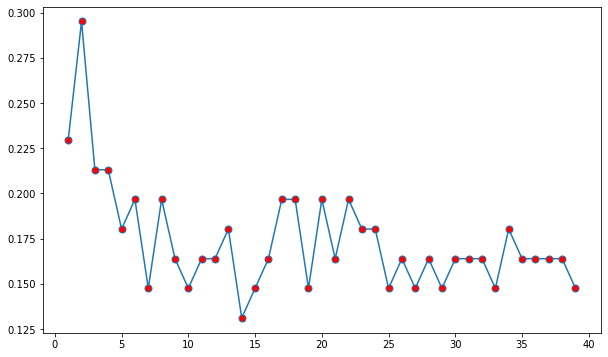

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err,marker = 'o',markerfacecolor = 'red',markersize = 7)

In [20]:
K_cl = KNeighborsClassifier(n_neighbors= 14)

K_cl.fit(X_train,y_train)
yknn_pred = K_cl.predict(X_test)

print(accuracy_score(y_test,yknn_pred ))
print(confusion_matrix(y_test,yknn_pred ))
print(classification_report(y_test,yknn_pred ))

0.8688524590163934
[[21  2]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.94      0.84      0.89        38

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 500, random_state=0)

rfc.fit(X_train,y_train)
y_rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test,y_rfc_pred ))
print(confusion_matrix(y_test,y_rfc_pred ))
print(classification_report(y_test,y_rfc_pred ))

0.8852459016393442
[[21  2]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.94      0.87      0.90        38

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [38]:
e = []
for i in range(100,1001,100):
    rfc = RandomForestClassifier(n_estimators= i, random_state=0)
    rfc.fit(X_train,y_train)
    yrfc_pred = rfc.predict(X_test)
    e.append(np.mean(yrfc_pred != y_test))


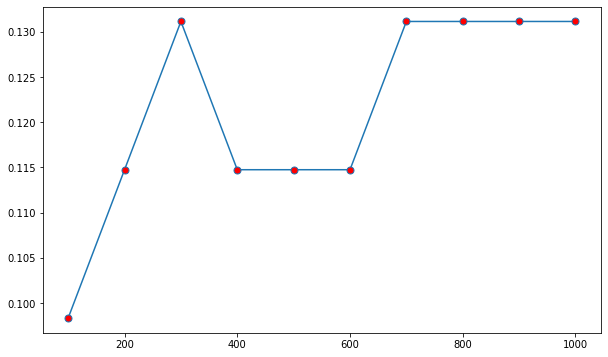

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(100,1001,100),e,marker = 'o',markerfacecolor = 'red',markersize = 7)

In [40]:
rfc = RandomForestClassifier(n_estimators= 100, random_state=0)

rfc.fit(X_train,y_train)
y_rfc_pred = rfc.predict(X_test)

print(accuracy_score(y_test,y_rfc_pred ))
print(confusion_matrix(y_test,y_rfc_pred ))
print(classification_report(y_test,y_rfc_pred ))

0.9016393442622951
[[21  2]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.94      0.89      0.92        38

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [46]:
pwd

'/home/swapnadeep/Documents/Machine_learning_portfolio_projects/seminar_proj'